In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf, matplotlib.pyplot as plt
import os

from tensorflow.keras import layers

## Data load

In [ ]:
# os.chdir('/content/drive/MyDrive/Cephalogram')
# import ceph_config as cf

# our modules
import utils.ceph_config as cf


model_save_path = os.path.join(os.getcwd(), 'output', f'{cf.RESOLUTION_CONFIG}', 'model')
os.makedirs(model_save_path, exist_ok=True)

image_feature = np.load(os.path.join(os.getcwd(), 'output', f'{cf.RESOLUTION_CONFIG}', 'feature', 'feature.npy'))
binary_array = np.load(os.path.join(os.getcwd(), 'output', f'{cf.RESOLUTION_CONFIG}', 'array', 'binary_array.npy'))
int_array = np.load(os.path.join(os.getcwd(), 'output', f'{cf.RESOLUTION_CONFIG}', 'array', 'int_array.npy'))

image_feature_2 = image_feature.astype('float32')
binary_array_2 = binary_array.astype('float32')
int_array_2 = int_array.astype('float32')


print(image_feature_2.shape)
print(binary_array_2.shape)
print(int_array_2.shape)

print(image_feature_2.dtype)
print(binary_array_2.dtype)
print(int_array_2.dtype)

(6928, 96)
(6928, 3)
(6928,)
float32
float32
float32


In [ ]:
image_feature_2[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12046756, 0.16078244, 0.24355917,
       0.31226146, 0.36712787, 0.41173664, 0.4456107 , 0.47638363,
       0.50214696, 0.5097805 , 0.5       , 0.48139316, 0.45467556,
       0.4191317 , 0.3781011 , 0.34661257, 0.3263359 , 0.32418895,
       0.33993322, 0.3370706 , 0.31512403, 0.30367368, 0.30271947,
       0.26884544, 0.20229009, 0.1586355 , 0.13812022, 0.13454199,
       0.14718512, 0.1846374 , 0.24594466, 0.27528626, 0.06846375,
       0.10472328, 0.17771947, 0.24355917, 0.30295804, 0.36259544,
       0.4255725 , 0.46159348, 0.47232822, 0.48664126, 0.50477

In [ ]:
binary_array_2[:10]

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
int_array_2[:10]

array([0., 1., 2., 3., 4., 5., 6., 7., 0., 1.], dtype=float32)

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train_all, x_test, y_train_all, y_test = train_test_split(image_feature_2, int_array_2, test_size=0.2, random_state=7)
# x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.1, random_state=7)

# x2_train_all, x2_test, y2_train_all, y2_test = train_test_split(image_feature_2, binary_array, test_size=0.2, random_state=7)
# x2_train, x2_val, y2_train, y2_val = train_test_split(x2_train_all, y2_train_all, test_size=0.1, random_state=7)

# print(x_train.shape)
# print(y_train.shape)
# print(x_val.shape)
# print(y_val.shape)
# print(x_test.shape)
# print(y_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split

x_test = image_feature_2[4560:5760]
# x_train_all = image_feature_2[0:4560, 5760:]
x_train_all = np.concatenate((image_feature_2[0:4560], image_feature_2[5760:]))

y_test = int_array_2[4560:5760]
y_train_all = np.concatenate((int_array_2[0:4560], int_array_2[5760:]))

y_test2 = binary_array[4560:5760]
y2_train_all = np.concatenate((binary_array[0:4560], binary_array[5760:]))

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.1, random_state=7)
_, _, y2_train, y2_val = train_test_split(x_train_all, y2_train_all, test_size=0.1, random_state=7)


print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(5155, 96)
(5155,)
(573, 96)
(573,)
(1200, 96)
(1200,)


## 우선 int로 표현한 label에 대해서 제대로 훈련되는지 확인

### Model create

In [ ]:
# model 생성

input = layers.Input(shape=(96,))
x = layers.Flatten()(input)
x = layers.Dense(48)(x)

x = layers.Dense(8)(x)
output = layers.Activation('softmax')(x)

model = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96)]              0         
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 48)                4656      
                                                                 
 dense_1 (Dense)             (None, 8)                 392       
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
Total params: 5048 (19.72 KB)
Trainable params: 5048 (19.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size  = 8
epochs      = 200

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=[x_val, y_val])

Epoch 1/200
645/645 [==============================] - 3s 3ms/step - loss: 0.9847 - accuracy: 0.7451 - val_loss: 0.4147 - val_accuracy: 0.8935
Epoch 2/200
645/645 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 0.9082 - val_loss: 0.2555 - val_accuracy: 0.9145
Epoch 3/200
645/645 [==============================] - 1s 2ms/step - loss: 0.2255 - accuracy: 0.9214 - val_loss: 0.2099 - val_accuracy: 0.9145
Epoch 4/200
645/645 [==============================] - 1s 2ms/step - loss: 0.1965 - accuracy: 0.9313 - val_loss: 0.1904 - val_accuracy: 0.9337
Epoch 5/200
645/645 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.9368 - val_loss: 0.1702 - val_accuracy: 0.9372
Epoch 6/200
645/645 [==============================] - 1s 2ms/step - loss: 0.1653 - accuracy: 0.9370 - val_loss: 0.2294 - val_accuracy: 0.9092
Epoch 7/200
645/645 [==============================] - 1s 2ms/step - loss: 0.1589 - accuracy: 0.9379 - val_loss: 0.1453 - val_accuracy: 0.9407

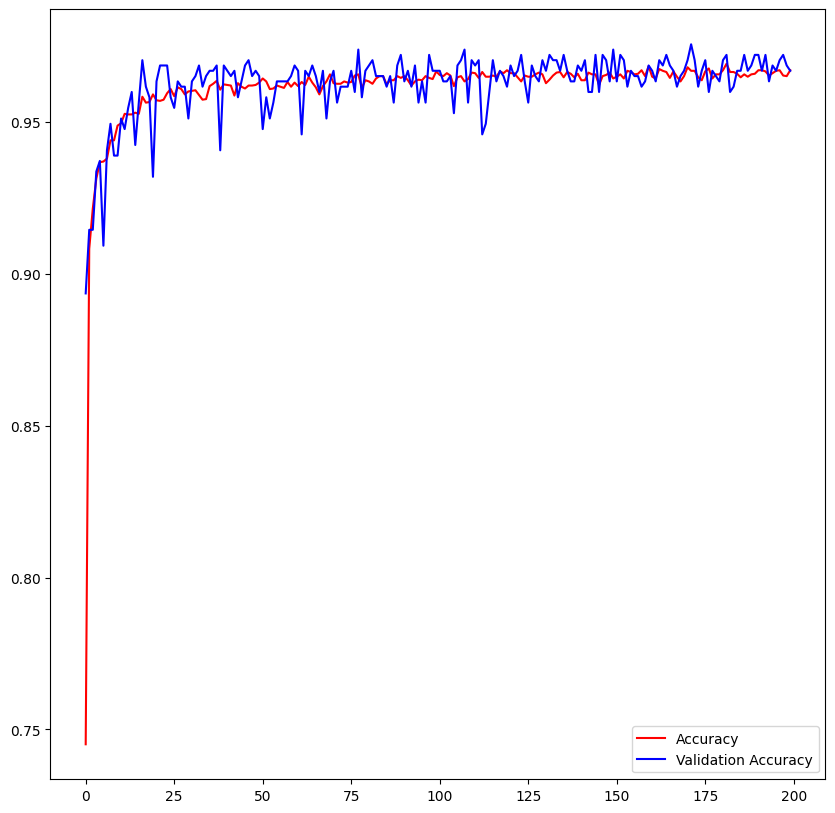

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(history.history['accuracy'], 'r', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')

plt.legend()
plt.show()

In [ ]:
model.save(os.path.join(model_save_path, 'int_model.keras'))

## binary로 표현한 label에 대해 확인

[참조 페이지 1](https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/)   
[참조 페이지 2](https://wandb.ai/ayush-thakur/dl-question-bank/reports/A-Guide-to-Multi-Label-Classification-on-Keras--VmlldzoyMDgyMDU)

### Model create

In [ ]:
# model 생성

# input_2 = layers.Input(shape=(96, 1))
# x_2 = layers.Flatten()(input_2)
# x_2 = layers.Dense(48)(x_2)
# x_2 = layers.Dense(3)(x_2)
# output_2 = layers.Activation('sigmoid')(x_2)

# model_2 = tf.keras.Model(inputs=input_2, outputs=output_2)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_shape = (None, 96)))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(y2_train.shape[1], activation='sigmoid'))


model_2.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, None, 128)         12416     
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 dense_3 (Dense)             (None, None, 64)          8256      
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 dense_4 (Dense)             (None, None, 3)           195       
                                                                 
Total params: 20867 (81.51 KB)
Trainable params: 20867 (81.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

---   
test

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5155, 96)
(1200, 96)


In [ ]:
x_train.reshape(-1, 96, 1).shape

(5155, 96, 1)

In [ ]:
y_train[:40]

array([1., 2., 5., 4., 6., 1., 7., 3., 7., 2., 3., 1., 3., 7., 4., 3., 1.,
       0., 4., 1., 4., 1., 1., 7., 7., 3., 2., 2., 1., 3., 4., 0., 4., 7.,
       3., 5., 4., 7., 4., 6.], dtype=float32)

---

In [ ]:
# from tensorflow.keras.utils import to_categorical

batch_size  = 8
epochs      = 200

# history_2 = model_2.fit(x_train.reshape(-1, 96, 1), y2_train, batch_size=batch_size, epochs=epochs,
#                     validation_data=[x_test.reshape(-1, 96, 1), y2_test])

history_2 = model_2.fit(x_train, y2_train, batch_size=batch_size, epochs=epochs,
                    validation_data=[x_val, y2_val])

Epoch 1/200
645/645 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.7738 - val_loss: 0.1332 - val_accuracy: 0.8517
Epoch 2/200
645/645 [==============================] - 2s 3ms/step - loss: 0.1028 - accuracy: 0.8188 - val_loss: 0.0861 - val_accuracy: 0.7696
Epoch 3/200
645/645 [==============================] - 2s 3ms/step - loss: 0.0821 - accuracy: 0.8219 - val_loss: 0.0685 - val_accuracy: 0.8569
Epoch 4/200
645/645 [==============================] - 2s 3ms/step - loss: 0.0735 - accuracy: 0.8208 - val_loss: 0.0677 - val_accuracy: 0.8464
Epoch 5/200
645/645 [==============================] - 2s 3ms/step - loss: 0.0661 - accuracy: 0.8149 - val_loss: 0.0656 - val_accuracy: 0.8709
Epoch 6/200
645/645 [==============================] - 2s 3ms/step - loss: 0.0619 - accuracy: 0.8227 - val_loss: 0.0632 - val_accuracy: 0.8726
Epoch 7/200
645/645 [==============================] - 2s 3ms/step - loss: 0.0591 - accuracy: 0.8237 - val_loss: 0.0626 - val_accuracy: 0.8604

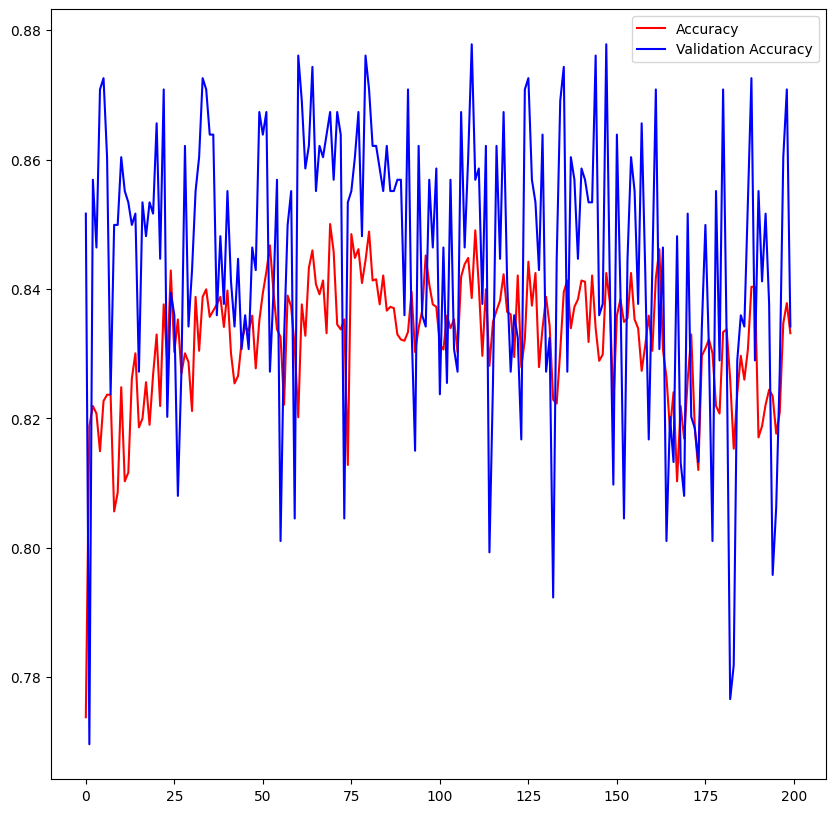

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(history_2.history['accuracy'], 'r', label='Accuracy')
plt.plot(history_2.history['val_accuracy'], 'b', label='Validation Accuracy')

plt.legend()
plt.show()

In [ ]:
model_2.save(os.path.join(model_save_path, 'binary_model.keras'))